In [24]:
from google.colab import files

In [25]:
import pandas as pd
import numpy as np
import uuid
import string
import re
import nltk
import math
import matplotlib.pyplot as plt


from transformers import pipeline
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

In [ ]:
uploaded = files.upload()

In [8]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('TrustPilotData.csv')
df

,Location,Ratings,Title,Text,Month,Year
0,GB,1,Disgraceful,"So, not only are most things on Prime Video no...",Apr,2024
1,GB,1,"Awful service- constant errors, terrible distr...",The service used to be pretty good when it did...,Apr,2024
2,DE,2,Terrible with ads,Wow the audacity to play ads on prime video is...,Apr,2024
3,GB,1,Why is a company worth 1.86 TRILLION…,Why is a company worth 1.86 TRILLION (Yes real...,Apr,2024
4,GB,1,Very poor value for money the fact that…,Very poor value for money the fact that one of...,Apr,2024
...,...,...,...,...,...,...
947,AU,5,genius,"genius, brilliant.",Apr,2020
948,NZ,5,genius,"genius, brilliant.",Apr,2020
949,GB,3,Amazon Prime advantages and disadvantages,I signed up for the free trial to watch 'All o...,Dec,2019
950,DE,4,I found the choice of movies and things…,I found the choice of movies and things to wat...,Sept,2019


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  952 non-null    object
 1   Ratings   952 non-null    int64 
 2   Title     952 non-null    object
 3   Text      948 non-null    object
 4   Month     952 non-null    object
 5   Year      952 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


In [11]:
df.isnull().sum()

Location    0
Ratings     0
Title       0
Text        4
Month       0
Year        0
dtype: int64

In [12]:
import uuid
df['UUID'] = [uuid.uuid4() for _ in range(len(df))]
df = df.drop('Name', axis=1)

KeyError: "['Name'] not found in axis"

In [14]:
df['Summary'] = df['Text'].astype(str) + ' # ' + df['Title'].astype(str)
df = df.drop('Text', axis=1)

In [16]:
df = df.drop_duplicates(subset=['Summary'], keep='first')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 263
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Location  247 non-null    object
 1   Ratings   247 non-null    int64 
 2   Title     247 non-null    object
 3   Month     247 non-null    object
 4   Year      247 non-null    int64 
 5   UUID      247 non-null    object
 6   Summary   247 non-null    object
dtypes: int64(2), object(5)
memory usage: 15.4+ KB


In [18]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import re

for index, row in df.iterrows():

    text = row['Summary']

    #lowercae
    text = text.lower()

    #remove punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    #sentiment analysis
    analysis = TextBlob(str(text))

    if analysis.sentiment.polarity > 0:
        sentiment_label = 'Positive'
    elif analysis.sentiment.polarity == 0:
        sentiment_label = 'Neutral'
    else:
        sentiment_label = 'Negative'

    df.at[index, 'Sentiment'] = sentiment_label
    df.at[index, 'Sentiment_Score'] = analysis.sentiment.polarity

In [20]:
df


,Location,Ratings,Title,Month,Year,UUID,Summary,Sentiment,Sentiment_Score
0,GB,1,Disgraceful,Apr,2024,40ea3ced-21a2-4069-91d0-d3add406eb12,"So, not only are most things on Prime Video no...",Positive,0.100000
1,GB,1,"Awful service- constant errors, terrible distr...",Apr,2024,269246f9-3e7c-404a-96a9-d499fcb734ba,The service used to be pretty good when it did...,Negative,-0.012169
2,DE,2,Terrible with ads,Apr,2024,e6b6c02d-0ac0-445e-a6c9-2e0a4b4514dd,Wow the audacity to play ads on prime video is...,Negative,-0.180000
3,GB,1,Why is a company worth 1.86 TRILLION…,Apr,2024,f3d40ad1-2da9-4fd4-b8f6-b83b6d8f8d01,Why is a company worth 1.86 TRILLION (Yes real...,Positive,0.225000
4,GB,1,Very poor value for money the fact that…,Apr,2024,d7d7c88a-3fe0-49cd-9e72-fe8cc7b4ac54,Very poor value for money the fact that one of...,Negative,-0.162857
...,...,...,...,...,...,...,...,...,...
258,US,2,Streaming was a beautiful thing,Apr,2020,ef82ec83-54ac-4fba-b725-92174c4b2766,"Streaming is a beautiful thing, and amazon has...",Positive,0.093717
259,AU,5,genius,Apr,2020,bd548052-a8ce-46b9-9179-41e7261654cb,"genius, brilliant. # genius",Positive,0.900000
261,GB,3,Amazon Prime advantages and disadvantages,Dec,2019,a5340fbb-1537-4901-9ce8-86d375002187,I signed up for the free trial to watch 'All o...,Positive,0.243939
262,DE,4,I found the choice of movies and things…,Sept,2019,a82eb53d-fede-4bd3-9d19-8ab8c1ea3fd9,I found the choice of movies and things to wat...,Positive,0.340909


In [21]:
# Save the DataFrame back to the CSV file
df.to_csv('results.csv', index=False)

In [22]:
df['Summary'] = df.apply(lambda row: nltk.word_tokenize(row['Summary']), axis=1) # Tokenization of data

import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['Summary'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud

    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)

    plt.figure(figsize=(10,8), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

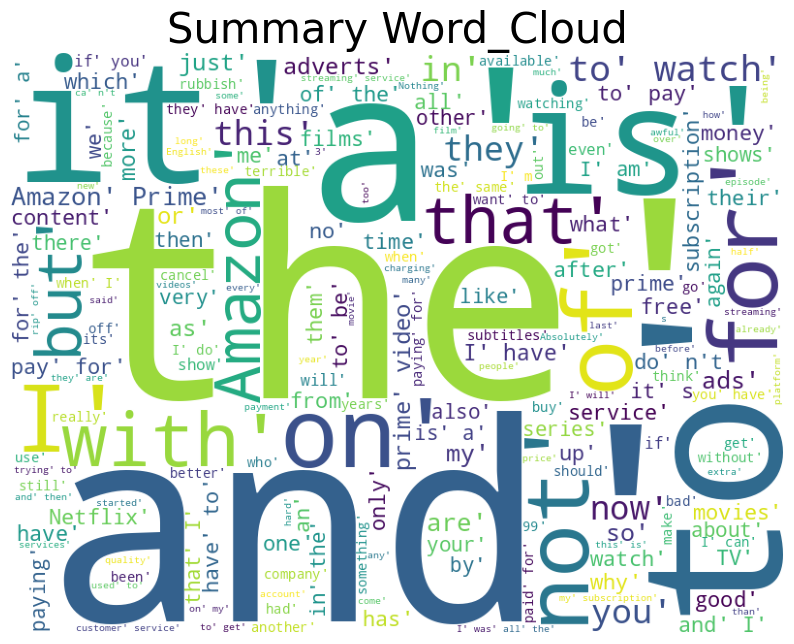

In [23]:
show_wordcloud(df,'Summary Word_Cloud')